# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1057]:
import pandas as pd
import numpy as np
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
from timeit import default_timer as timer
%matplotlib inline

In [616]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [159]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',auth=('user', 'pass'))
with open("image-predictions.tsv",'wb') as f:
    f.write(r.content)

In [167]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [94]:
import tweepy

consumer_key = 'y4952eTzQwX9eSuCzlYZ8kA9j'
consumer_secret = '4tSBsKVormgqNQtm3i8hvnUvKZ68Rih7ubKcLFuF9a7SNRjKJL'
access_token = '1613265161174786065-areYP0NHAq1d6wIdBHZ30agLmK0IUk'
access_token_secret = 'RMl3RBMjZQ3wnN5rBCGCnk5DCoOncAI4ZTkhEL7d2PKrb'


auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [617]:
tweet_ids = twitter_archive.tweet_id
tweet_ids

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [92]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
# There was slight modification of the code on line 17 because the exception syntax has been updated 
#source https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Fail
1040: 744234799360020481
Fail
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Fail
1044: 743835915802583040
Fail
1045: 743609206067040256
Fail
1046: 743595368194129920
Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Success
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
F

Fail
1312: 707021089608753152
Fail
1313: 707014260413456384
Fail
1314: 706904523814649856
Fail
1315: 706901761596989440
Fail
1316: 706681918348251136
Fail
1317: 706644897839910912
Fail
1318: 706593038911545345
Fail
1319: 706538006853918722
Fail
1320: 706516534877929472
Fail
1321: 706346369204748288
Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Success
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Success
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Success
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
F

Fail
1584: 687102708889812993
Fail
1585: 687096057537363968
Fail
1586: 686947101016735744
Fail
1587: 686760001961103360
Fail
1588: 686749460672679938
Fail
1589: 686730991906516992
Fail
1590: 686683045143953408
Fail
1591: 686618349602762752
Fail
1592: 686606069955735556
Fail
1593: 686394059078897668
Fail
1594: 686386521809772549
Fail
1595: 686377065986265092
Fail
1596: 686358356425093120
Fail
1597: 686286779679375361
Fail
1598: 686050296934563840
Fail
1599: 686035780142297088
Fail
1600: 686034024800862208
Fail
1601: 686007916130873345
Fail
1602: 686003207160610816
Fail
1603: 685973236358713344
Fail
1604: 685943807276412928
Fail
1605: 685906723014619143
Fail
1606: 685681090388975616
Fail
1607: 685667379192414208
Fail
1608: 685663452032069632
Fail
1609: 685641971164143616
Success
1610: 685547936038666240
Fail
1611: 685532292383666176
Fail
1612: 685325112850124800
Fail
1613: 685321586178670592
Fail
1614: 685315239903100929
Fail
1615: 685307451701334016
Fail
1616: 685268753634967552
Fail
16

Fail
1856: 675531475945709568
Fail
1857: 675522403582218240
Fail
1858: 675517828909424640
Fail
1859: 675501075957489664
Fail
1860: 675497103322386432
Fail
1861: 675489971617296384
Fail
1862: 675483430902214656
Fail
1863: 675432746517426176
Fail
1864: 675372240448454658
Fail
1865: 675362609739206656
Fail
1866: 675354435921575936
Fail
1867: 675349384339542016
Success
1868: 675334060156301312
Fail
1869: 675166823650848770
Fail
1870: 675153376133427200
Fail
1871: 675149409102012420
Fail
1872: 675147105808306176
Fail
1873: 675146535592706048
Success
1874: 675145476954566656
Fail
1875: 675135153782571009
Fail
1876: 675113801096802304
Fail
1877: 675111688094527488
Fail
1878: 675109292475830276
Fail
1879: 675047298674663426
Fail
1880: 675015141583413248
Fail
1881: 675006312288268288
Success
1882: 675003128568291329
Fail
1883: 674999807681908736
Fail
1884: 674805413498527744
Fail
1885: 674800520222154752
Fail
1886: 674793399141146624
Fail
1887: 674790488185167872
Fail
1888: 674788554665512960
F

Fail
2128: 670319130621435904
Fail
2129: 670303360680108032
Fail
2130: 670290420111441920
Fail
2131: 670093938074779648
Fail
2132: 670086499208155136
Fail
2133: 670079681849372674
Fail
2134: 670073503555706880
Fail
2135: 670069087419133954
Fail
2136: 670061506722140161
Fail
2137: 670055038660800512
Fail
2138: 670046952931721218
Fail
2139: 670040295598354432
Fail
2140: 670037189829525505
Fail
2141: 670003130994700288
Fail
2142: 669993076832759809
Fail
2143: 669972011175813120
Fail
2144: 669970042633789440
Fail
2145: 669942763794931712
Fail
2146: 669926384437997569
Fail
2147: 669923323644657664
Fail
2148: 669753178989142016
Fail
2149: 669749430875258880
Fail
2150: 669684865554620416
Success
2151: 669683899023405056
Fail
2152: 669682095984410625
Fail
2153: 669680153564442624
Fail
2154: 669661792646373376
Fail
2155: 669625907762618368
Fail
2156: 669603084620980224
Success
2157: 669597912108789760
Fail
2158: 669583744538451968
Fail
2159: 669573570759163904
Fail
2160: 669571471778410496
Fail

In [163]:
## Convert json to dataframe

tweet_json = pd.read_json('tweet_json.txt',lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
Dataset: twitter_archive

1. retweeted tweet are not needed

2. Missing dog names

3. Some dog names are in lower case

4. Wrong Datatype for timestamp

5. Four dog stages can be collapse into one

6. Text column contains unecessary infomation(ratings,url)

7. Missing dog stages

8. rating_denominator  column not needed

9. Change dog_stage to title

### Tidiness issues


1. All dataset could merge into  one.

2. Select only _favorited and retweeted_  

3. Separate ratings,url from text

4. Change dog_stage to category datatype 


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [1180]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
tweet_json_clean = tweet_json.copy()
image_predictions_clean = image_predictions.copy()

### Issue #1: _retweeted_ tweet are not needed

#### Define:  Since we are interested in only the original ratings (no retweets)  we select only the only tweet .
_Hint_ : we want to select the cases where retweeted_status_id is null
We drop columns that will be needed such as retweeted_status_id ,retweeted_status_user_id ,
,retweeted_status_timestamp, in_reply_to_status_id , in_reply_to_user_id


#### Code

In [1181]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [1182]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1, inplace= True)
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis = 1, inplace= True)

#### Test

In [1183]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #2: Find and Replace Missing dog names

#### Define 
Use a fuction to search for dog names that follows a pattern in the text column

#### Code

In [1184]:
twitter_archive_clean.name.value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [1185]:
dog_names = []
for text in twitter_archive_clean.text:
    if "This is" in text:
        ltw = text.split()
        dog_names.append(ltw[ltw.index('is')+1])
    elif "Meet" in text:
        dog_names.append(text.split()[1])
    elif "Here we have" in text:
        dog_names.append("HWH")
    elif "name is" in text:
        ltw = text.split()
        dog_names.append(ltw[ltw.index('is')+1])
    elif "Say hello to" in text:
        ltw = text.split()
        dog_names.append(ltw[ltw.index('to')+1])
    else:
        dog_names.append(np.nan)
        
## The sentence that start with 'Here we have' follows an irregular pattern so they names are somewhat difficult 
# to find. So replace their names with HWH

In [1186]:
# Join new dog names to dataset
twitter_archive_clean['dog_names'] = dog_names

In [1187]:
# change the name we couldnt find to NaN
twitter_archive_clean.dog_names = twitter_archive_clean.dog_names.mask(twitter_archive_clean.dog_names.str.islower().fillna(False))

In [1188]:
# clean up the names a little bit 
twitter_archive_clean.dog_names = twitter_archive_clean.dog_names.str.replace('.','',regex=True)

In [1189]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_names
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Franklin


#### Test

In [1190]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
 12  dog_names           1414 non-null   object
dtypes: int64(3), object(10)
memory usage: 237.9+ KB


### Issue  4 #: Four dog stages can be collapse into one

#### Define:

Merge the four dogstages into one using python melt function


#### Code

In [1191]:
df = twitter_archive_clean.copy()

twitter_archive_clean.drop(['source','expanded_urls','rating_denominator','name'],axis =1, inplace= True)
twitter_archive_clean = pd.melt(twitter_archive_clean ,id_vars = ['tweet_id','timestamp','text','rating_numerator','dog_names',]
             ,value_vars = ['doggo','floofer','pupper','puppo'],  var_name = 'dog_stage',value_name='dog_stages')

In [1192]:
twitter_archive_clean = twitter_archive_clean.groupby('tweet_id', as_index=False).max()
twitter_archive_clean.drop('dog_stage', axis=1, inplace=True);

#### Test

In [1193]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2175 non-null   int64 
 1   timestamp         2175 non-null   object
 2   text              2175 non-null   object
 3   rating_numerator  2175 non-null   int64 
 4   dog_names         1414 non-null   object
 5   dog_stages        2175 non-null   object
dtypes: int64(2), object(4)
memory usage: 102.1+ KB


### Issue 5 #: Change datatype for timestamp

#### Define:
Convert the timestamp column to correct datatype using pd.to_datetime

#### Code

In [1194]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [1195]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   int64              
 1   timestamp         2175 non-null   datetime64[ns, UTC]
 2   text              2175 non-null   object             
 3   rating_numerator  2175 non-null   int64              
 4   dog_names         1414 non-null   object             
 5   dog_stages        2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 102.1+ KB


### Issue 6 : Text column contains unecessary infomation(ratings,url)

#### Define
Search for that come after ratings and delete them

#### Code

In [1196]:
text_list = []
for text in twitter_archive_clean.text:
    text_list.append(re.sub(r'\d/\d\d.*|\d\d/\d\d..*',"",text))
twitter_archive_clean['text'] = text_list

#### Test

In [1197]:
twitter_archive_clean.text.sample(5)

1399    This is Brody. He's a lifeguard. Always prepar...
911     This is Reptar. He specifically asked for his ...
500     This is a Sizzlin Menorah spaniel from Brookly...
2162    Here's a puppo that seems to be on the fence a...
65         Say hello to Kenneth. He likes Reese's Puffs. 
Name: text, dtype: object

### Issue 7 : Change dog_stages to categorical and  to title

### Define
Change dog_stage to category datatype using astype


### Code


In [1198]:
twitter_archive_clean.dog_stages = twitter_archive_clean.dog_stages.astype('category')

In [1199]:
twitter_archive_clean.dog_stages = twitter_archive_clean.dog_stages.str.capitalize()

### Test

In [1200]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   int64              
 1   timestamp         2175 non-null   datetime64[ns, UTC]
 2   text              2175 non-null   object             
 3   rating_numerator  2175 non-null   int64              
 4   dog_names         1414 non-null   object             
 5   dog_stages        2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 102.1+ KB


### Issue
Tide up and merge data into one

#### Define

Select some important columns from tweet_json data set and merge it with the twitter_archive dataset for some visualization

In [1201]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     988 non-null    datetime64[ns, UTC]
 1   id                             988 non-null    int64              
 2   id_str                         988 non-null    int64              
 3   full_text                      988 non-null    object             
 4   truncated                      988 non-null    bool               
 5   display_text_range             988 non-null    object             
 6   entities                       988 non-null    object             
 7   extended_entities              816 non-null    object             
 8   source                         988 non-null    object             
 9   in_reply_to_status_id          35 non-null     float64            
 10  in_reply_to_status_id_str 

In [1202]:
## Select 'id','retweet_count','favorite_count from tweet_json_clean
df2 = tweet_json_clean[['id','retweet_count','favorite_count']]

In [1203]:
twitter_archive_master = pd.merge(left=twitter_archive_clean,right=df2, left_on='tweet_id', right_on='id', how = 'left')

In [1204]:
# drop id column
twitter_archive_master.drop('id', axis=1, inplace = True)

In [1205]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   int64              
 1   timestamp         2175 non-null   datetime64[ns, UTC]
 2   text              2175 non-null   object             
 3   rating_numerator  2175 non-null   int64              
 4   dog_names         1414 non-null   object             
 5   dog_stages        2175 non-null   object             
 6   retweet_count     837 non-null    float64            
 7   favorite_count    837 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 152.9+ KB


In [1206]:
twitter_archive_master = pd.merge(left=twitter_archive_master,right=image_predictions_clean, left_on='tweet_id', right_on='tweet_id', how = 'left')

In [1207]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   int64              
 1   timestamp         2175 non-null   datetime64[ns, UTC]
 2   text              2175 non-null   object             
 3   rating_numerator  2175 non-null   int64              
 4   dog_names         1414 non-null   object             
 5   dog_stages        2175 non-null   object             
 6   retweet_count     837 non-null    float64            
 7   favorite_count    837 non-null    float64            
 8   jpg_url           1994 non-null   object             
 9   img_num           1994 non-null   float64            
 10  p1                1994 non-null   object             
 11  p1_conf           1994 non-null   float64            
 12  p1_dog            1994 non-null   object             
 13  p2 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [1208]:
 twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight: Insight on Top 5 ratings used

We can see from the visualization below that, most of tweet that rated dogs were ratings between 10/10 and 14/10.
With 12/10 being the highest.

### Visualization

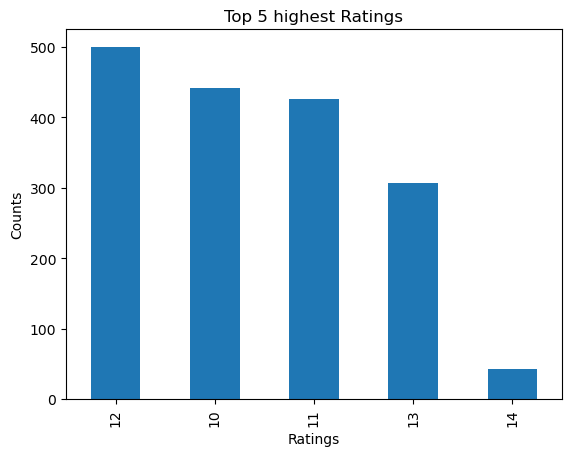

In [1209]:
Top_5_highest_ratings = twitter_archive_master.query('rating_numerator >= 10 & rating_numerator <= 14')
Top_5_highest_ratings.rating_numerator.value_counts().sort_values(ascending=False).plot(kind = 'bar',
                                                                                        xlabel = 'Ratings',
                                                                                       ylabel = 'Counts',
                                                                                       title = 'Top 5 highest Ratings');


### Insight: Insights on the top 5 dog breeds 
From the bargraph below, using the p1 (algorithm's #1 prediction for the image in the tweet) we found out that most dogs were classified as Golden retriever, followed by Labrador retriever, whereas Pug breed was the 5 highest dog breed

### Visualization

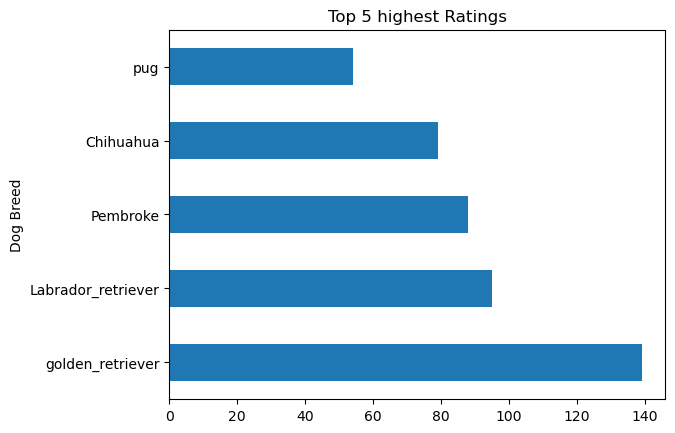

In [1210]:
Top_5_breeds = twitter_archive_master.p1.value_counts().sort_values(ascending=False).head(5)
Top_5_breeds.plot(kind = 'barh',xlabel = 'Dog Breed',ylabel = 'Counts',title = 'Top 5 highest Ratings');


### Insight: Insight on Distribution of Dog Stages
Since most of the dog stages column were None, we drop them, after the illustration, we found out that 68% of the  dogs were Pupper, followed by Doggo ie (21.8%) with Floofer having the lowest portion ie (2.9%)

### Visualization

In [1211]:
dog_stage = twitter_archive_master.replace("None", np.nan)

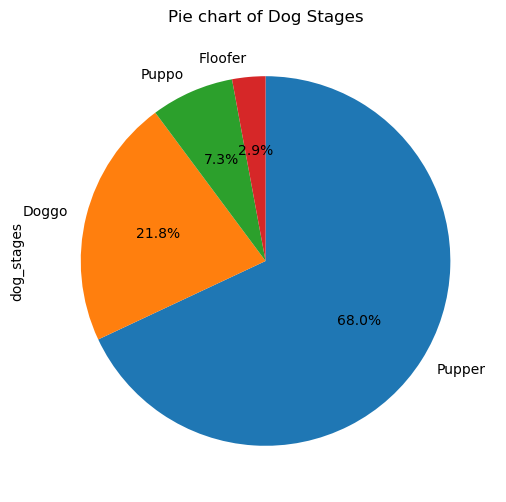

In [1212]:
dog_stage.dog_stages.value_counts().plot(kind='pie',figsize=(14,6),  
                                         autopct='%1.1f%%', startangle = 90, 
                                         counterclock = False,
                                         title = 'Pie chart of Dog Stages');